In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv'
df = pd.read_csv(url)
df.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.shape

(13200, 7)

In [ ]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

<function matplotlib.pyplot.show>

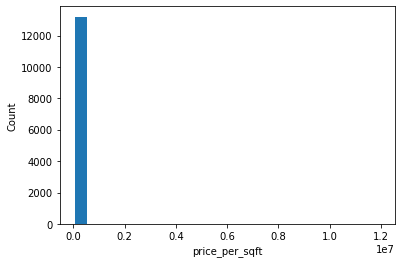

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show>

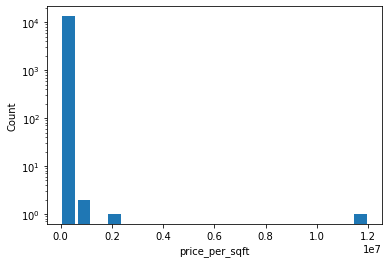

In [ ]:
plt.hist(df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.yscale('log')
plt.show

##Remove outliers using percentile technique

In [ ]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001,0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [ ]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]

In [ ]:
outliers.sample(15)

In [ ]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [ ]:
df.shape[0]-df2.shape[0]

28

## 4 standard deviation to remove outliers

In [ ]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [ ]:
df[(df2.price_per_sqft>max_limit) | (df.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2371,other,5 Bedroom,3000.0,6.0,1000.0,5,33333
6135,other,3 Bedroom,4273.0,3.0,1100.0,3,25743
7808,other,5 Bedroom,2400.0,5.0,625.0,5,26041
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500
5654,other,4 Bedroom,4920.0,5.0,1150.0,4,23373
6959,Raja Rajeshwari Nagar,4 Bedroom,1350.0,4.0,340.0,4,25185
4638,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43,27500
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041
5747,other,5 Bedroom,1200.0,5.0,300.0,5,25000


In [ ]:
df3 = df2[(df2.price_per_sqft<max_limit) & (df2.price_per_sqft>min_limit)]
df3.shape

(13047, 7)

In [ ]:
df2.shape[0] - df3.shape[0]

125

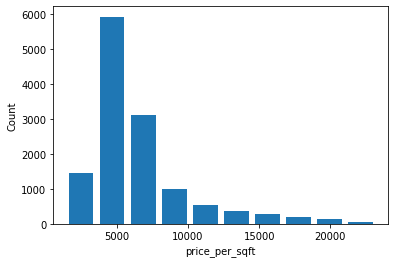

In [ ]:
plt.hist(df3.price_per_sqft,bins=10,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.show()

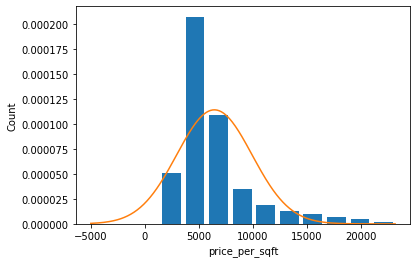

In [ ]:
from scipy.stats import norm
import numpy as np
plt.hist(df3.price_per_sqft,bins=10,rwidth=0.8,density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
rng = np.arange(-5000,df3.price_per_sqft.max(),100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

##use zscore of 4 to remove outliers

In [ ]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()
df2.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [ ]:
outliers_z = df2[(df2.zscore<-4) | (df2.zscore>4)]
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6744,HAL 2nd Stage,2 Bedroom,600.0,3.0,145.0,2,24166,4.226578
3144,other,5 BHK,8321.0,5.0,2700.0,5,32448,6.226568
9636,other,4 Bedroom,2100.0,3.0,1000.0,4,47619,9.890157
11919,other,3 Bedroom,1524.0,4.0,400.0,3,26246,4.728869
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260,5.215223


In [ ]:
outliers_z.shape

(125, 8)

In [ ]:
df4 = df2[(df2.zscore>-4) & (df2.zscore<4)]
df4.shape

(13047, 8)

In [ ]:
df2.shape[0]-df4.shape[0]

125